![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Visualising What CNNs Learn**

---


In this lesson, we use **Keras with a TensorFlow 2.0** to visualise the following (see below). This helps you gain a better understanding of what's going on under the hood and de-mystifies some of the deep learning aspects.**
1. Training a basic CNN on the MNIST Dataset
2. Visualise its filters
3. Visualise the filter activations as we propagate an input image

# **Training a Basic CNN on the MNIST Dataset**

In [1]:
# We can load the built in datasets from this function
from tensorflow.keras.datasets import mnist

# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10476452556781165867
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16154099712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14387797403959670079
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]
Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [2]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [4]:
batch_size = 128
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 12s 7ms/step - loss: 2.2178 - accuracy: 0.3538 - val_loss: 2.0861 - val_accuracy: 0.5606
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 1.7081 - accuracy: 0.6554 - val_loss: 1.1287 - val_accuracy: 0.7840
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.7728 - accuracy: 0.8227 - val_loss: 0.5332 - val_accuracy: 0.8674
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4821 - accuracy: 0.8691 - val_loss: 0.4089 - val_accuracy: 0.8903
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4010 - accuracy: 0.8879 - val_loss: 0.3580 - val_accuracy: 0.9008
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3614 - accuracy: 0.8964 - val_loss: 0.3276 - val_accuracy: 0.9076
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3359 - accuracy: 0.9032 - val_loss: 0.3085 - val_accuracy: 0.9124
Epoch

## **Get the symbolic outputs of each "key" layer (we gave them unique names).**

In [5]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <keras.layers.convolutional.Conv2D at 0x7f2c75cf5a10>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f2c75cf5810>,
 'dense': <keras.layers.core.dense.Dense at 0x7f2c64103f90>,
 'dense_1': <keras.layers.core.dense.Dense at 0x7f2c64061ed0>,
 'flatten': <keras.layers.core.flatten.Flatten at 0x7f2c6405d350>,
 'max_pooling2d': <keras.layers.pooling.MaxPooling2D at 0x7f2c6405d0d0>}

## **Get the shapes of only our Conv Filters**

In [6]:
# summarize filter shapes
for layer in model.layers:
  # check for convolutional layer
  
  if 'conv' not in layer.name:
    continue

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


## **Let's take a look at the weights of our first Conv Layer**

In [7]:
# retrieve weights from the first Conv (hidden) layer
filters, biases = model.layers[0].get_weights()

In [8]:
# Let's take a look at our filters
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[ 0.12783894,  0.05744795,  0.1404749 , -0.0114915 ,
           0.20156711,  0.051214  ,  0.23528017, -0.08819991,
           0.08089859,  0.0350923 , -0.03488416,  0.04943611,
          -0.14094867,  0.02362542,  0.02610658,  0.05264443,
          -0.02990664, -0.13360491,  0.17395617,  0.12701416,
          -0.09674808,  0.12261227, -0.00485816,  0.22528557,
          -0.08254739, -0.08543507, -0.13173701,  0.1658294 ,
          -0.03639129, -0.10551153, -0.08526942,  0.14077044]],

        [[-0.0135273 ,  0.01525384, -0.02081921,  0.14262143,
           0.28693998,  0.14295417,  0.0280277 ,  0.01707534,
          -0.02739048, -0.01186016,  0.02540726, -0.00629226,
           0.0699156 ,  0.0361085 ,  0.024713  ,  0.1609403 ,
          -0.064633  , -0.05620199,  0.12286514, -0.07743277,
          -0.12143757, -0.07877436,  0.13668089,  0.19480488,
          -0.09609991,  0.07525428, -0.04306762,  0.08643786,
           0.09990588, -0.10563118, -0.12308792, -0.04174584]],

  

In [9]:
# And now let's look at our biases
print(biases.shape)
biases

(32,)


array([ 1.2436567e-02,  3.2393534e-02,  3.4019504e-02,  1.8563812e-03,
        1.3932361e-02,  1.1969624e-02,  1.5771115e-02, -4.6509085e-06,
        2.6941529e-02,  1.4937915e-02,  7.2606085e-03,  4.5968923e-03,
       -3.6878511e-04,  6.0539120e-03,  3.4567971e-02,  1.0323428e-03,
        1.9910758e-02,  2.5238063e-02,  6.5689646e-03,  8.8035902e-03,
        3.7588259e-05,  3.3247460e-02,  1.5061902e-02,  9.4737886e-03,
       -4.5055413e-06,  6.4722775e-03,  1.1837985e-03,  3.1881724e-02,
        1.9098243e-02,  2.9441698e-02,  1.1119182e-03,  7.6848203e-03],
      dtype=float32)

## **Let's normalize filter values to 0-1 so we can visualize them**

Our Filter weights range

In [10]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')
filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.14094866812229156 and Max =  0.31546518206596375
After Normalisation, Min = 0.0 and Max =  1.0


## **Visualize our Trained Fillters**

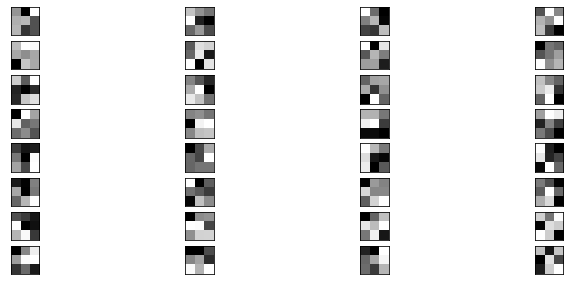

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# plot first few filters and set plot size
n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    #print(f.shape)

    # Arrange in subplot of 4 x 8
    ax = plt.subplot(n_filters, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    ix += 1
    
# show the figure
plt.show()

# **Filter Activations**

In [13]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 2 layers
layer_outputs = [layer.output for layer in model.layers[:2]]

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [14]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 64) dtype=float32 (created by layer 'conv2d_1')>]

(-0.5, 27.5, 27.5, -0.5)

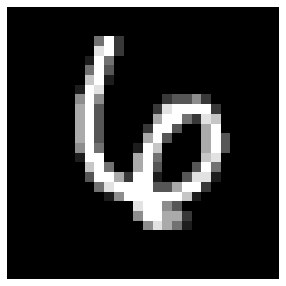

In [15]:
import matplotlib.pyplot as plt

img_tensor = x_test[22].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="gray")
plt.axis('off')

## **Get the output after the 2nd Conv Filter (after ReLU)**

In [16]:
# Returns a list of two Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

Number of layer activations: 2


#### **The activation of the first convolution layer for the image input**

In [17]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [18]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## **The output of the 4th Conv filter Feature Map in the first Conv layer**

No handles with labels found to put in legend.


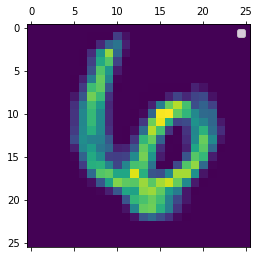

In [20]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

## **Create a function that displys the activations of specific layers**

In [21]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

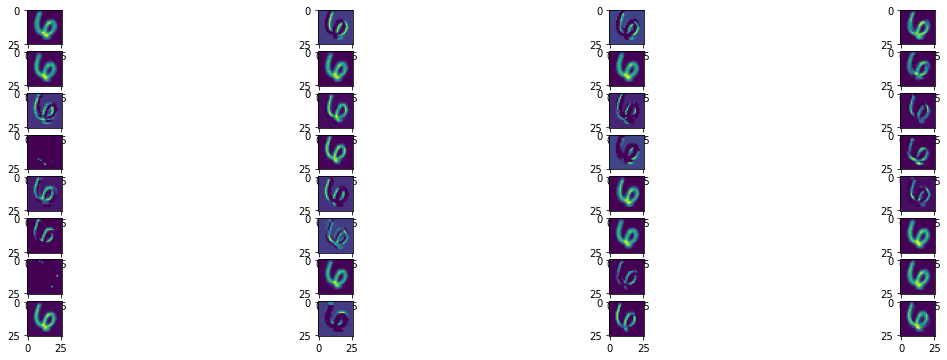

In [22]:
display_activation(activations, 4, 8, 0)